In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [330]:
#Imports and cleans the data
from clean import cleaning

def import_data(url):
    shark_df = pd.read_excel(url)
    shark_df.dropna(axis=1, how='all', inplace=True)
    shark_df.dropna(axis=0, how='all', inplace=True)
    return shark_df

shark_df = import_data("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")
shark_df = cleaning(shark_df)

In [331]:
shark_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4454 entries, 0 to 5541
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4454 non-null   datetime64[ns]
 1   Year        4454 non-null   float64       
 2   Type        4444 non-null   object        
 3   Country     4454 non-null   object        
 4   State       4454 non-null   object        
 5   Location    4383 non-null   object        
 6   Activity    4454 non-null   object        
 7   Name        4396 non-null   object        
 8   Sex         4170 non-null   object        
 9   Age         1437 non-null   float64       
 10  Injury      4439 non-null   object        
 11  Fatal       4454 non-null   object        
 12  Time        2814 non-null   object        
 13  Species     2750 non-null   object        
 14  Source      4443 non-null   object        
 15  Age Group   4454 non-null   object        
 16  Hemisphere  4454 non-null   o

In [332]:
shark_df.groupby(['Type', 'Sex']).size().reset_index(name='Counts')

,Type,Sex,Counts
0,Provoked,F,19
1,Provoked,M,349
2,Unknown,F,56
3,Unknown,M,397
4,Unprovoked,F,489
5,Unprovoked,M,2850


In [333]:
shark_df.pivot_table(index="Age Group", columns="Season", aggfunc='size', fill_value=0)

Season,Fall,Spring,Summer,Unknown,Winter
Age Group,,,,,
0-9,17,8,34,0,1
10-19,109,79,204,19,27
20-29,107,76,157,11,42
30-39,61,50,79,6,32
40-49,45,24,68,3,21
50-59,27,24,30,0,13
60-69,10,15,18,0,6
70-79,3,4,1,0,3
80-89,1,1,1,0,0


In [334]:
viz_sex_and_activity = shark_df.groupby(['Activity', 'Sex']).size().unstack().fillna(0).astype(int)
viz_sex_and_activity = viz_sex_and_activity.sort_values(by=['F', 'M'], ascending=False)

viz_sex_and_activity.head()

Sex,F,M
Activity,,
Swimming,162,632
Unknown,140,939
Wading,92,156
Surfing,69,946
Diving,44,202


In [335]:
grouped_activity_season = shark_df.groupby(['Activity', 'Season']).size().unstack().fillna(0).astype(int)
grouped_activity_season = grouped_activity_season.sort_values(by=["Spring", "Summer", "Fall", "Winter", "Unknown"], ascending=False)

grouped_activity_season.head()

Season,Fall,Spring,Summer,Unknown,Winter
Activity,,,,,
Unknown,293,254,518,15,153
Surfing,358,212,276,43,149
Swimming,155,150,409,40,51
Fishing,78,61,168,1,33
Diving,65,53,96,4,37


<Axes: xlabel='Count', ylabel='Activity'>

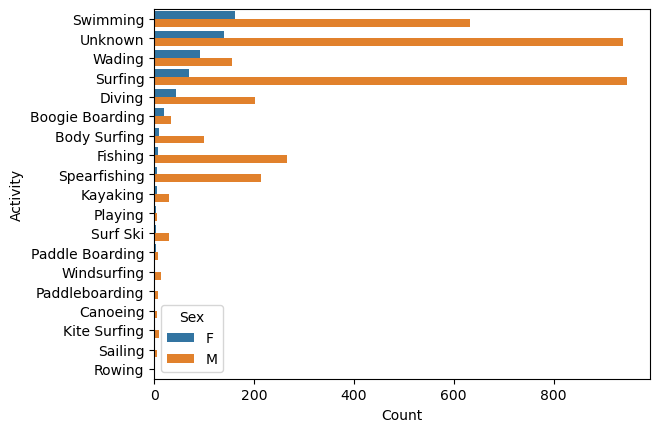

In [336]:
def vizualize_acitvity_sex_group(df):
    viz_sex_and_activity = shark_df.groupby(['Activity', 'Sex']).size().unstack().fillna(0).astype(int)
    viz_sex_and_activity = viz_sex_and_activity.sort_values(by=['F', 'M'], ascending=False)
    viz_sex_and_activity.reset_index(inplace=True)
    viz_sex_and_activity = viz_sex_and_activity.melt(id_vars='Activity', var_name='Sex', value_name='Count')
    return sns.barplot(data=viz_sex_and_activity, y='Activity', x='Count', hue='Sex')

vizualize_acitvity_sex_group(shark_df)

<Axes: xlabel='Count', ylabel='Age Group'>

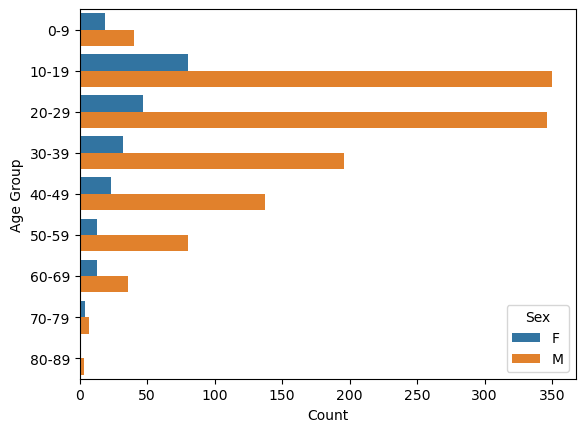

In [337]:
def vizualize_age_sex_group(df):

    df = df[df['Age Group'] != 'Unknown']
    viz_sex_and_activity = df.groupby(['Age Group', 'Sex']).size().unstack().fillna(0).astype(int)
    viz_sex_and_activity.reset_index(inplace=True)
    viz_sex_and_activity = viz_sex_and_activity.melt(id_vars='Age Group', var_name='Sex', value_name='Count')
    viz_sex_and_activity.sort_values(by='Age Group', inplace=True)
    return sns.barplot(data=viz_sex_and_activity, y='Age Group', x='Count', hue='Sex')

vizualize_age_sex_group(shark_df)

<Axes: xlabel='Count', ylabel='Activity'>

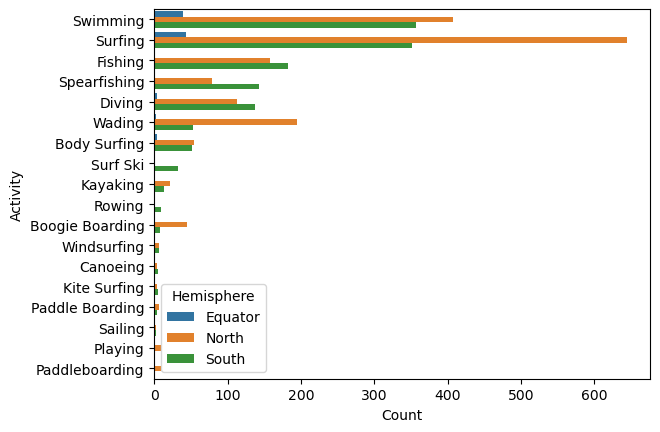

In [338]:
def grouped_activity_hemisphere(df):
    filtered_df = df[df['Activity'] != 'Unknown']
    grouped_activity_hemisphere = filtered_df.groupby(['Activity', 'Hemisphere']).size().unstack().fillna(0).astype(int)
    grouped_activity_hemisphere = grouped_activity_hemisphere.sort_values(by=["South", "North", "Equator"], ascending=False)
    grouped_activity_hemisphere.reset_index(inplace=True)
    grouped_activity_hemisphere = grouped_activity_hemisphere.melt(id_vars = "Activity", var_name = "Hemisphere", value_name = "Count")
    return sns.barplot(data=grouped_activity_hemisphere, y='Activity', x='Count', hue='Hemisphere')

grouped_activity_hemisphere(shark_df)

<Axes: xlabel='Month', ylabel='Count'>

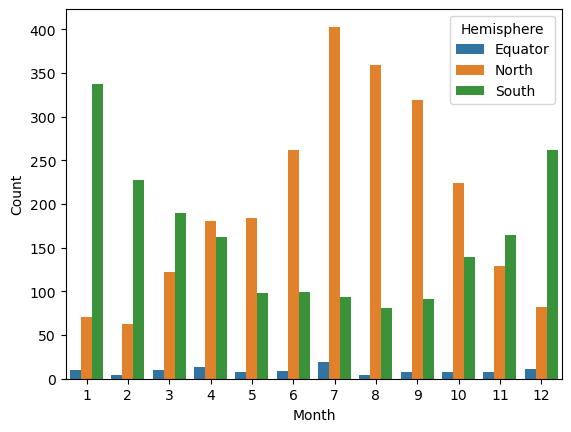

In [339]:
def grouped_month_hemisphere(df):
    grouped_activity_hemisphere = shark_df.groupby(['Month', 'Hemisphere']).size().unstack().fillna(0).astype(int)
    grouped_activity_hemisphere = grouped_activity_hemisphere.sort_values(by=["South", "North", "Equator"], ascending=False)
    grouped_activity_hemisphere.reset_index(inplace=True)
    grouped_activity_hemisphere = grouped_activity_hemisphere.melt(id_vars = "Month", var_name = "Hemisphere", value_name = "Count")
    return sns.barplot(data=grouped_activity_hemisphere, y='Count', x='Month', hue='Hemisphere')

grouped_month_hemisphere(shark_df)

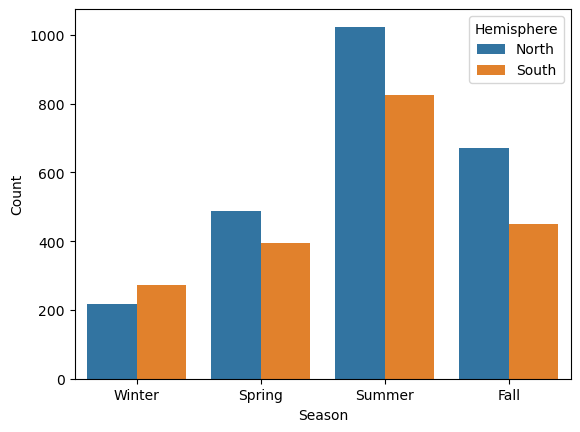

In [340]:
def seasonal_incidents(df):
    season_order = ["Winter", "Spring", "Summer", "Fall"]
    
    grouped_activity_hemisphere = df[df["Hemisphere"].isin(["North", "South"])].groupby(['Season', 'Hemisphere']).size().unstack().fillna(0).astype(int)
    grouped_activity_hemisphere.reset_index(inplace=True)
    grouped_activity_hemisphere = grouped_activity_hemisphere.melt(id_vars = "Season", var_name = "Hemisphere", value_name = "Count")
    grouped_activity_hemisphere['Season'] = pd.Categorical(grouped_activity_hemisphere['Season'], categories=season_order, ordered=True)
    sns.barplot(data=grouped_activity_hemisphere, y='Count', x='Season', hue='Hemisphere')

seasonal_incidents(shark_df)

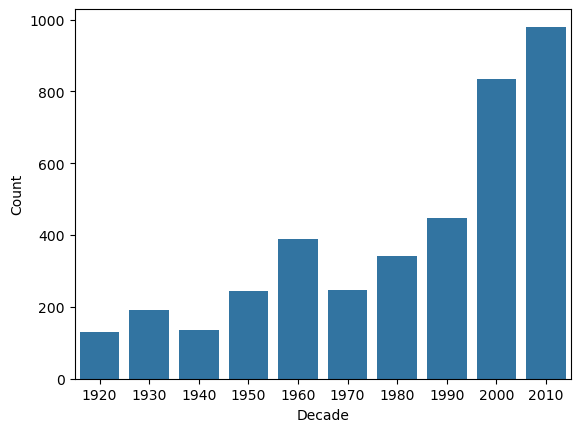

In [341]:
def grouped_decade_incidents(df):
    df["Decade"] = (df["Year"] // 10 * 10).astype(int) 
    df = df[(df['Decade'] >= 1920) & (df['Decade'] <= 2010)]  
    grouped_activity_year = df.groupby('Decade').size().reset_index(name='Count') 
    ax = sns.barplot(data=grouped_activity_year, x='Decade', y='Count')

grouped_decade_incidents(shark_df)

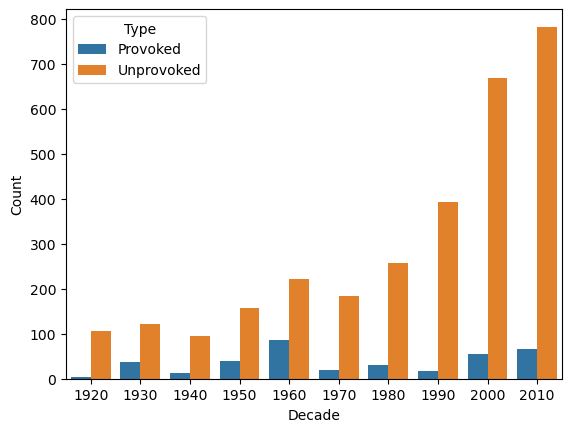

In [342]:
def decade_provoked(df):
    df = shark_df.copy()
    df["Decade"] = (df["Year"] // 10 * 10).astype(int)
    df = df[(df['Decade'] >= 1920) & (df['Decade'] <= 2010)]
    df = df[(df['Type'].isin(["Provoked", "Unprovoked"]))]
    
    # Group by 'Decade' and 'Sex', then count incidents
    grouped_activity_year = df.groupby(['Decade', 'Type']).size().reset_index(name='Count')
    
    # Create the bar plot with 'Decade' on x-axis and separate bars for 'Sex'
    ax = sns.barplot(data=grouped_activity_year, x='Decade', y='Count', hue='Type')

decade_provoked(shark_df)

C:\Users\olgeo\AppData\Local\Temp\ipykernel_17276\3596740795.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chrt.set_xticklabels(chrt.get_xticklabels(), rotation=45, ha='right')


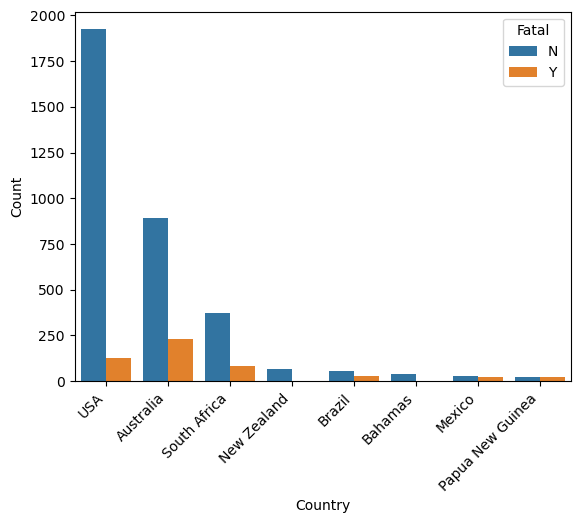

In [343]:
def country_fatal(df):
    grouped_country = df.groupby(['Country','Fatal']).size().reset_index(name='Count')
    #display(grouped_country.head())
    
    filt_countries = grouped_country[grouped_country['Fatal'].isin(["Y", "N"]) ]
    filt_countries = filt_countries[filt_countries['Count'] >=20 ].sort_values(by="Count", ascending=False)
    #display(filt_countries.head())
    
    chrt = sns.barplot(data=filt_countries, x='Country', y='Count', hue="Fatal")
    chrt.set_xticklabels(chrt.get_xticklabels(), rotation=45, ha='right')
    
    plt.show()

country_fatal(shark_df)

In [344]:
def calculate_fatality_percentage(df, column):
    # Group by the specified column and count incidents
    df = df[(df['Fatal'].isin(["Y", "N"]))]
    grouped_counts = df.groupby([column, 'Fatal']).size().unstack(fill_value=0)
    total_counts = grouped_counts.sum(axis=1)

    valid_groups = total_counts[total_counts >= 5].index
    filtered_grouped_counts = grouped_counts.loc[valid_groups]
    
    fatal_percentage = (filtered_grouped_counts['Y'] / filtered_grouped_counts.sum(axis=1)) * 100
    return fatal_percentage.reset_index(name='Fatality Percentage')


In [345]:
calculate_fatality_percentage(shark_df, "Age Group")

,Age Group,Fatality Percentage
0,0-9,3.703704
1,10-19,10.513447
2,20-29,11.325967
3,30-39,11.737089
4,40-49,8.571429
5,50-59,12.359551
6,60-69,19.565217
7,70-79,40.000000
8,Unknown,16.054716


In [346]:
group_by_columns = ['Type', 'Country', 'Activity', 'Sex', 'Age Group', 'Hemisphere', 'Month', 'Season', 'Decade']
results = {}

# Calculate fatality percentages for each group
for column in group_by_columns:
    results[column] = calculate_fatality_percentage(shark_df, column)


results["Country"].sort_values(by="Fatality Percentage", ascending = False)


,Country,Fatality Percentage
4,Croatia,87.500000
16,Kenya,60.000000
27,Vanuatu,60.000000
23,Reunion,60.000000
14,Jamaica,57.142857
22,Philippines,55.555556
5,Cuba,54.545455
21,Papua New Guinea,50.000000
17,Mexico,45.833333
19,New Caledonia,44.444444


C:\Users\olgeo\AppData\Local\Temp\ipykernel_17276\1280542354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Decade"] = df["Decade"].astype(int)


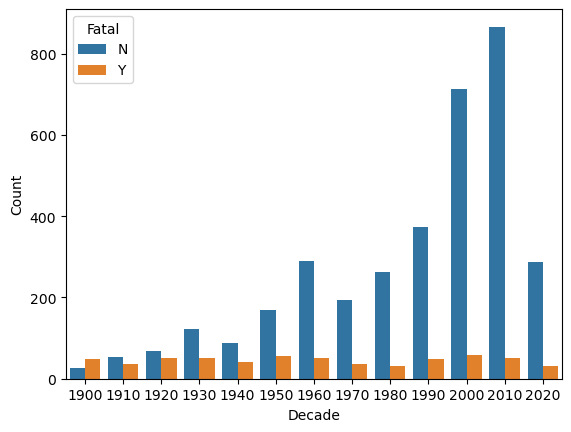

In [347]:
def fatal_decade(df):  
    df = df[(df['Fatal'].isin(["Y", "N"]))]    
    df["Decade"] = df["Decade"].astype(int)   
    grouped_activity_year = df.groupby(['Fatal', 'Decade']).size().reset_index(name='Count')
    ax = sns.barplot(data=grouped_activity_year, x='Decade', y='Count', hue='Fatal')

fatal_decade(shark_df)


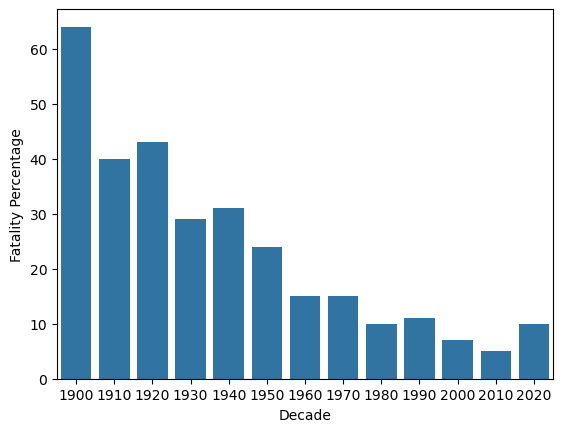

In [348]:
def decade_fatality_pct(df):
    results["Decade"] = calculate_fatality_percentage(df, "Decade")
    results["Decade"] = results["Decade"].astype(int)

    # Create the bar plot
    chrt = sns.barplot(data=results["Decade"], x='Decade', y='Fatality Percentage')
    plt.show()

decade_fatality_pct(shark_df)

In [349]:
# Display all results
for column, result in results.items():
    result = result.sort_values(by="Fatality Percentage", ascending = False)
    result["Fatality Percentage"] = result["Fatality Percentage"].round(2)
    display(result.head())
    print("\n")

,Type,Fatality Percentage
2,Unprovoked,15.92
1,Unknown,15.72
0,Provoked,1.49


,Country,Fatality Percentage
4,Croatia,87.50
16,Kenya,60.00
27,Vanuatu,60.00
23,Reunion,60.00
14,Jamaica,57.14


,Activity,Fatality Percentage
11,Sailing,100.00
15,Swimming,28.59
16,Unknown,20.28
18,Windsurfing,20.00
0,Body Surfing,19.63


,Sex,Fatality Percentage
1,M,15.75
0,F,9.71


,Age Group,Fatality Percentage
7,70-79,40.00
6,60-69,19.57
8,Unknown,16.05
5,50-59,12.36
3,30-39,11.74


,Hemisphere,Fatality Percentage
0,Equator,32.08
2,South,21.27
1,North,8.21


,Month,Fatality Percentage
11,12,24.23
0,1,18.88
1,2,17.22
2,3,15.00
8,9,14.69


,Season,Fatality Percentage
3,Unknown,32.08
4,Winter,20.50
2,Summer,13.50
1,Spring,13.24
0,Fall,12.57


,Decade,Fatality Percentage
0,1900,64
2,1920,43
1,1910,40
4,1940,31
3,1930,29


In [327]:
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,Age Group,Hemisphere,Month,Season,Decade
0,2024-03-15,2024.0,Unprovoked,Australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13.0,"Minor injuries to back, abdomen and legs",UNKNOWN,16h00,Tiger shark,"Yahoo News, 3/15/2024",10-19,South,3,Fall,2020
1,2024-03-04,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",Unknown,North,3,Spring,2020
2,2024-03-02,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11.0,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",10-19,North,3,Spring,2020
3,2024-02-25,2024.0,Unprovoked,Australia,Western Australia,"Sandlnd Island, Jurian Bay",Unknown,female,F,46.0,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",40-49,South,2,Summer,2020
8,2024-01-09,2024.0,Unprovoked,Australia,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64.0,Leg bitten,N,13h00,White shark,"A. Currie, GSAF",60-69,South,1,Summer,2020
